# **Running Pyspark in Colab**

In [197]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark

 Set the environment path which enables you to run Pyspark in your Colab environment

In [198]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"

Quick Installation Test

In [199]:
import findspark
findspark.find()

'/content/spark-3.0.2-bin-hadoop2.7'

In [200]:
findspark.init()

 Create Spark 

In [201]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()


# **Data Analysis**

import data

In [202]:
ls

sample_data/                   spark-3.0.2-bin-hadoop2.7.tgz.1
spark-3.0.2-bin-hadoop2.7/     spark-3.0.2-bin-hadoop2.7.tgz.2
spark-3.0.2-bin-hadoop2.7.tgz  UCI_Credit_Card.csv


In [238]:
df = spark.read.csv("./UCI_Credit_Card.csv", header=True, inferSchema=True)
df.registerTempTable('df')

In [204]:
# Convert Integer to String Type
from pyspark.sql.types import StringType
df = df.withColumn("SEX",df["SEX"].cast(StringType()))
df = df.withColumn("EDUCATION",df["EDUCATION"].cast(StringType()))
df = df.withColumn("MARRIAGE",df["MARRIAGE"].cast(StringType()))
df = df.withColumn("PAY_0",df["PAY_0"].cast(StringType()))
df = df.withColumn("PAY_2",df["PAY_2"].cast(StringType()))
df = df.withColumn("PAY_3",df["PAY_3"].cast(StringType()))
df = df.withColumn("PAY_4",df["PAY_4"].cast(StringType()))
df = df.withColumn("PAY_5",df["PAY_5"].cast(StringType()))
df = df.withColumn("PAY_6",df["PAY_6"].cast(StringType()))

In [205]:
# Preliminary Analysis and Insights
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: double (nullable = true)
 |-- SEX: string (nullable = true)
 |-- EDUCATION: string (nullable = true)
 |-- MARRIAGE: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: string (nullable = true)
 |-- PAY_2: string (nullable = true)
 |-- PAY_3: string (nullable = true)
 |-- PAY_4: string (nullable = true)
 |-- PAY_5: string (nullable = true)
 |-- PAY_6: string (nullable = true)
 |-- BILL_AMT1: double (nullable = true)
 |-- BILL_AMT2: double (nullable = true)
 |-- BILL_AMT3: double (nullable = true)
 |-- BILL_AMT4: double (nullable = true)
 |-- BILL_AMT5: double (nullable = true)
 |-- BILL_AMT6: double (nullable = true)
 |-- PAY_AMT1: double (nullable = true)
 |-- PAY_AMT2: double (nullable = true)
 |-- PAY_AMT3: double (nullable = true)
 |-- PAY_AMT4: double (nullable = true)
 |-- PAY_AMT5: double (nullable = true)
 |-- PAY_AMT6: double (nullable = true)
 |-- default_payment_next_month: integer (nullable = true)


In [206]:
df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+--------------------+------------------+--------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+----------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+--------------------------+
|summary|               ID|         LIMIT_BAL|               SEX|         EDUCATION|          MARRIAGE|              AGE|             PAY_0|               PAY_2|             PAY_3|               PAY_4|             PAY_5|            PAY_6|        BILL_AMT1|        BILL_AMT2|        BILL_AMT3|         BILL_AMT4|        BILL_AMT5|       BILL_AMT6|         PAY_AMT1|          PAY_AMT2|         PAY_AMT3|          PAY_AMT4|          PAY_AMT5|         PAY_AMT6|default_payment_next_month|
+-------+-----------------+---

Spark Transformation and Action Operations

In [207]:
df.show(5)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default_payment_next_month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|  20000.0|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|   3913.0|   3102.0|    689.0|      0.0|      0.0|      0.0|     0.0|   689.0|     0.0|     0.0|     0.0|     0.0|                         1|
|  2| 120000.0|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|   2682.0|   1725.0|   2682.0|   3272.0|  

explore data

In [234]:
# SEX Gender (1=male, 2=female)
df.groupby(["SEX","default_payment_next_month"]).count().show()

+---+--------------------------+-----+
|SEX|default_payment_next_month|count|
+---+--------------------------+-----+
|  1|                         0| 9015|
|  1|                         1| 2873|
|  2|                         0|14349|
|  2|                         1| 3763|
+---+--------------------------+-----+



In [236]:
# EDUCATION  (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df.groupby(["EDUCATION","default_payment_next_month"]).count().sort("EDUCATION", ascending=True).show()

+---------+--------------------------+-----+
|EDUCATION|default_payment_next_month|count|
+---------+--------------------------+-----+
|        0|                         0|   14|
|        1|                         0| 8549|
|        1|                         1| 2036|
|        2|                         0|10700|
|        2|                         1| 3330|
|        3|                         1| 1237|
|        3|                         0| 3680|
|        4|                         0|  116|
|        4|                         1|    7|
|        5|                         0|  262|
|        5|                         1|   18|
|        6|                         0|   43|
|        6|                         1|    8|
+---------+--------------------------+-----+



In [237]:
# MARRIAGE  (1=married, 2=single, 3=others)
df.groupby(["MARRIAGE","default_payment_next_month"]).count().sort("MARRIAGE", ascending=True).show()

+--------+--------------------------+-----+
|MARRIAGE|default_payment_next_month|count|
+--------+--------------------------+-----+
|       0|                         1|    5|
|       0|                         0|   49|
|       1|                         1| 3206|
|       1|                         0|10453|
|       2|                         0|12623|
|       2|                         1| 3341|
|       3|                         1|   84|
|       3|                         0|  239|
+--------+--------------------------+-----+



In [239]:
# AGE 
df.groupby(["AGE","default_payment_next_month"]).count().sort("AGE", ascending=True).show()

+---+--------------------------+-----+
|AGE|default_payment_next_month|count|
+---+--------------------------+-----+
| 21|                         1|   14|
| 21|                         0|   53|
| 22|                         0|  391|
| 22|                         1|  169|
| 23|                         1|  247|
| 23|                         0|  684|
| 24|                         0|  827|
| 24|                         1|  300|
| 25|                         0|  884|
| 25|                         1|  302|
| 26|                         0| 1003|
| 26|                         1|  253|
| 27|                         1|  313|
| 27|                         0| 1164|
| 28|                         0| 1123|
| 28|                         1|  286|
| 29|                         1|  313|
| 29|                         0| 1292|
| 30|                         1|  274|
| 30|                         0| 1121|
+---+--------------------------+-----+
only showing top 20 rows



In [240]:
# LIMIT_BAL 
df.groupby(["LIMIT_BAL","default_payment_next_month"]).count().sort("LIMIT_BAL", ascending=True).show()

+---------+--------------------------+-----+
|LIMIT_BAL|default_payment_next_month|count|
+---------+--------------------------+-----+
|  10000.0|                         0|  296|
|  10000.0|                         1|  197|
|  16000.0|                         0|    2|
|  20000.0|                         0| 1278|
|  20000.0|                         1|  698|
|  30000.0|                         1|  568|
|  30000.0|                         0| 1042|
|  40000.0|                         1|   92|
|  40000.0|                         0|  138|
|  50000.0|                         0| 2480|
|  50000.0|                         1|  885|
|  60000.0|                         0|  592|
|  60000.0|                         1|  233|
|  70000.0|                         1|  210|
|  70000.0|                         0|  521|
|  80000.0|                         0| 1204|
|  80000.0|                         1|  363|
|  90000.0|                         0|  485|
|  90000.0|                         1|  166|
| 100000.0

In [251]:
# PAY_0
diff_0 = df.withColumn("diff_0", df["PAY_AMT1"] - df["BILL_AMT1"])
diff_0.groupby(['diff_0',"PAY_0","default_payment_next_month"]).count().sort("diff_0", ascending=True).show()


+---------+-----+--------------------------+-----+
|   diff_0|PAY_0|default_payment_next_month|count|
+---------+-----+--------------------------+-----+
|-913727.0|    0|                         0|    1|
|-726314.0|    0|                         0|    1|
|-624562.0|    0|                         0|    1|
|-605989.0|    0|                         0|    1|
|-602458.0|    0|                         0|    1|
|-599725.0|    0|                         0|    1|
|-590523.0|    0|                         1|    1|
|-586654.0|    5|                         1|    1|
|-585018.0|    0|                         0|    1|
|-581775.0|    4|                         1|    1|
|-581726.0|    0|                         0|    1|
|-576560.0|    2|                         1|    1|
|-570441.0|    0|                         0|    1|
|-562178.0|    0|                         1|    1|
|-555304.0|    0|                         0|    1|
|-546532.0|    0|                         0|    1|
|-546014.0|    0|              

In [208]:
### explore
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
data=pd.read_csv('./UCI_Credit_Card.csv',header=0)


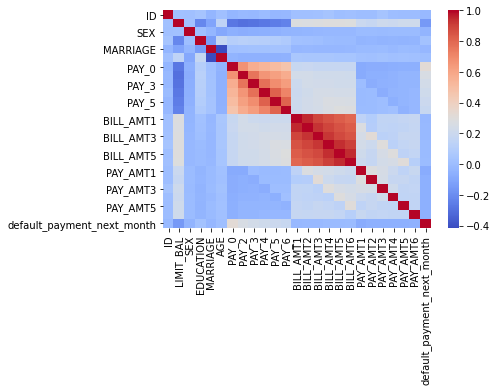

In [209]:
# correlation 
data_corr = data.corr()
sns.heatmap(data_corr,cmap='coolwarm')

In [210]:
df.select('default_payment_next_month').show(5)

+--------------------------+
|default_payment_next_month|
+--------------------------+
|                         1|
|                         1|
|                         0|
|                         0|
|                         0|
+--------------------------+
only showing top 5 rows



In [211]:
df.columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default_payment_next_month']

# **Creating a pipeline**

In [229]:
# ## transform string data
# from pyspark.ml import Pipeline
# from pyspark.ml.feature import StringIndexer

# stringCol = df['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
# indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in list(set(stringCol.columns)) ]


# pipeline = Pipeline(stages=indexers)
# data = pipeline.fit(df).transform(df)

# data.show()

In [230]:
# ## transform number data
# from pyspark.ml.feature import VectorAssembler
# required_features = ['LIMIT_BAL','SEX_index','EDUCATION_index','MARRIAGE_index','AGE','PAY_0_index','PAY_2_index','PAY_3_index','PAY_4_index','PAY_5_index','PAY_6_index','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# #Input all the features in one vector column
# assembler = VectorAssembler(inputCols= required_features ,outputCol = 'features')
# output = assembler.transform(data)
# output.show(5, truncate=False)


In [212]:
## transform string data
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

stringCol = df['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
# stringCol = df['SEX','EDUCATION','MARRIAGE']
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in list(set(stringCol.columns)) ]


pipeline = Pipeline(stages=indexers)
data = pipeline.fit(df).transform(df)

data.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+-----------+--------------+-----------+-----------+---------------+-----------+-----------+---------+-----------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default_payment_next_month|PAY_6_index|MARRIAGE_index|PAY_3_index|PAY_4_index|EDUCATION_index|PAY_2_index|PAY_5_index|SEX_index|PAY_0_index|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+-----------+--------------+-----------+-----------+---------------+-----------+-----------+---------+-----------+
|

In [213]:
## transform number data
from pyspark.ml.feature import VectorAssembler
required_features = ['LIMIT_BAL','SEX_index','EDUCATION_index','MARRIAGE_index','AGE','PAY_0_index','PAY_2_index','PAY_3_index','PAY_4_index','PAY_5_index','PAY_6_index','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
# required_features = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
# required_features = ['LIMIT_BAL','SEX_index','EDUCATION_index','MARRIAGE_index','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

#Input all the features in one vector column
assembler = VectorAssembler(inputCols= required_features ,outputCol = 'features')
output = assembler.transform(data)
# output = assembler.transform(df)
output.show(5, truncate=False)


+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+-----------+--------------+-----------+-----------+---------------+-----------+-----------+---------+-----------+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|ID |LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default_payment_next_month|PAY_6_index|MARRIAGE_index|PAY_3_index|PAY_4_index|EDUCATION_index|PAY_2_index|PAY_5_index|SEX_index|PAY_0_index|features                                                                                                                                               |
+---+---------+---+---------+-

**LogisticRegression model**

In [214]:
# split the data set by random
train_data, test_data = output.randomSplit([0.7, 0.3])

In [215]:
train_data.show(5, truncate=False)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+-----------+--------------+-----------+-----------+---------------+-----------+-----------+---------+-----------+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|ID |LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default_payment_next_month|PAY_6_index|MARRIAGE_index|PAY_3_index|PAY_4_index|EDUCATION_index|PAY_2_index|PAY_5_index|SEX_index|PAY_0_index|features                                                                                                                                                 |
+---+---------+---+-------

In [216]:
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
print(type(train_data))

Training Dataset Count: 20966
Test Dataset Count: 9034
<class 'pyspark.sql.dataframe.DataFrame'>


In [217]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol='default_payment_next_month',featuresCol='features')

model = lr.fit(train_data)
pred = model.transform(test_data)

In [218]:
pred.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+-----------+--------------+-----------+-----------+---------------+-----------+-----------+---------+-----------+--------------------+--------------------+--------------------+----------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default_payment_next_month|PAY_6_index|MARRIAGE_index|PAY_3_index|PAY_4_index|EDUCATION_index|PAY_2_index|PAY_5_index|SEX_index|PAY_0_index|            features|       rawPrediction|         probability|prediction|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+---

**Evaluate model**

In [219]:
# Evaluate model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="default_payment_next_month", rawPredictionCol="prediction", metricName='areaUnderROC')
auc = evaluator.evaluate(pred)
print("Area under ROC = %s" % auc)

Area under ROC = 0.6408658480650318


In [220]:
# other evaluation model
# Select (prediction, true label) and compute test error
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="default_payment_next_month", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(pred)
print("rmse  = %s" % rmse )

rmse  = 0.4217624343507187


In [221]:
y_true = pred.select(['default_payment_next_month']).collect()
y_pred = pred.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7081
           1       0.69      0.32      0.44      1953

    accuracy                           0.82      9034
   macro avg       0.76      0.64      0.67      9034
weighted avg       0.81      0.82      0.80      9034



In [222]:
# confusion_matrix
class_temp = pred.select("default_payment_next_month").groupBy("default_payment_next_month")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["default_payment_next_month"].values.tolist()

In [223]:
class_temp

[0, 1]

In [224]:
# confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_true = pred.select("default_payment_next_month")
y_true = y_true.toPandas()

y_pred = pred.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_temp)
cnf_matrix

array([[6799,  282],
       [1325,  628]])

In [225]:
# confusion_matrix function
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6799  282]
 [1325  628]]


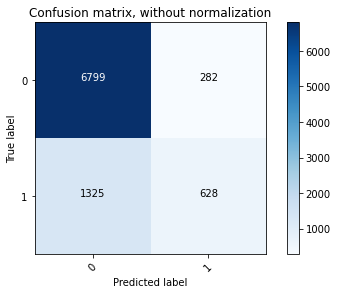

In [226]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp,
                      title='Confusion matrix, without normalization')
plt.show()

In [227]:
pred.show(5)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+-----------+--------------+-----------+-----------+---------------+-----------+-----------+---------+-----------+--------------------+--------------------+--------------------+----------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default_payment_next_month|PAY_6_index|MARRIAGE_index|PAY_3_index|PAY_4_index|EDUCATION_index|PAY_2_index|PAY_5_index|SEX_index|PAY_0_index|            features|       rawPrediction|         probability|prediction|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+---

In [228]:
# Serving Apache Spark Machine Learning models 
model.save("model.pkl")